<a href="https://colab.research.google.com/github/JaimeRoss/Data-Science/blob/main/Healthcare%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score,\
ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config (transform_output='pandas')

In [2]:
# Loading data for dataset
URL = "/content/drive/MyDrive/Student folder for data science bootcamp/CodingDojo/02-MachineLearning/Week07/Data/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(URL)
dfml = df.copy()

In [3]:
# Inspecting info and displaying first 5 rows of dataset.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


1. Source of data
- https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

2. Brief description of data
- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient

3. What is the target?
- Stroke
4. What does one row represent? (A person? A business? An event? A product?)
- A person
5. Is this a classification or regression problem?
- Classification
6. How many features does the data have?
- 12
7. How many rows are in the dataset?
- 5110
8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- missing values, duplicates,innapropriate columns.

In [4]:
# dropping unnecessary/unwanted columns
df = df.drop(columns = "id")
# Checking if unwanted column has been dropped
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# checking and addressing duplicates
dupli = df.duplicated().sum()
# Printing result
print(f"There are {dupli} duplicates in this dataset.")

There are 0 duplicates in this dataset.


There are no duplicates in this dataset

In [6]:
# Checking and addressing missing values
missval = df.isna().sum().sum()
# Printing result
print(f"There are {missval} missing values in this dataset.")

There are 201 missing values in this dataset.


In [7]:
# Checking which columns or categories have missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The bmi column has missing values.

In [8]:
# Addressing missing values
df["bmi"] = df["bmi"].fillna(-1)
df["bmi"].value_counts()

-1.0     201
 28.7     41
 28.4     38
 27.6     37
 26.7     37
        ... 
 11.5      1
 40.6      1
 53.9      1
 97.6      1
 14.9      1
Name: bmi, Length: 419, dtype: int64

Missing values have been replaced with -1 as a placeholder.

In [9]:
# Checking and addressing inconsistencies
for col in df:
    print(f"Value counts for {col}")
    print(df[col].value_counts())
    print("\n")

Value counts for gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Value counts for age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64


Value counts for hypertension
0    4612
1     498
Name: hypertension, dtype: int64


Value counts for heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64


Value counts for ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


Value counts for work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Value counts for Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Value counts for avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name:

There are no inconsistencies in the dataset.

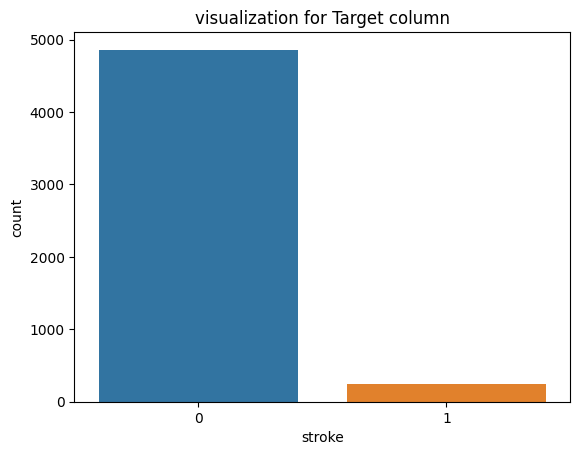

In [10]:
# Target Visualization
ax = sns.countplot(data = df, x = "stroke")
ax.set_title("visualization for Target column");

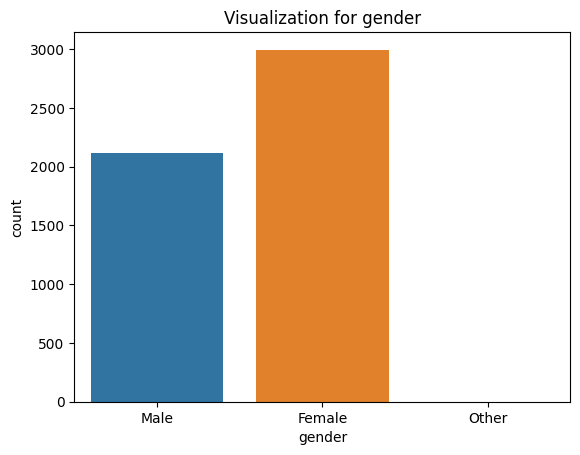

In [11]:
# Feature Visualization
ax = sns.countplot(data = df, x = "gender")
ax.set_title("Visualization for gender");

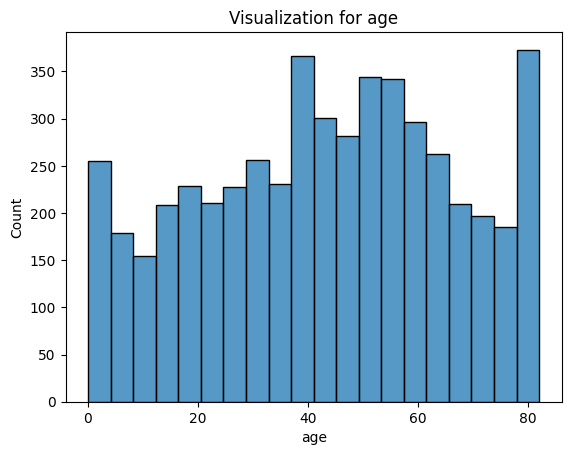

In [12]:
# Feature Visualization
ax = sns.histplot(data = df, x = "age")
ax.set_title("Visualization for age");

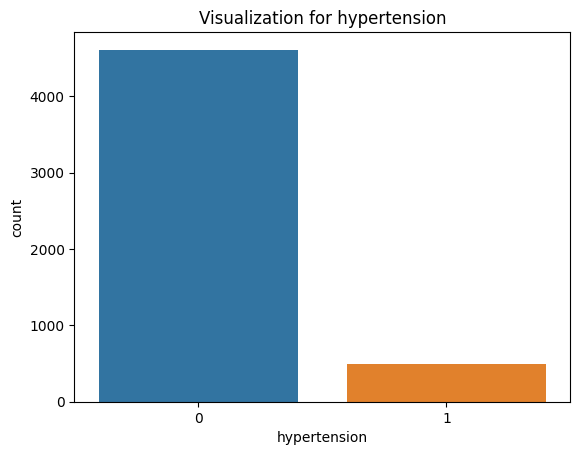

In [13]:
# Feature Visualization
ax = sns.countplot(data = df, x = "hypertension")
ax.set_title("Visualization for hypertension");

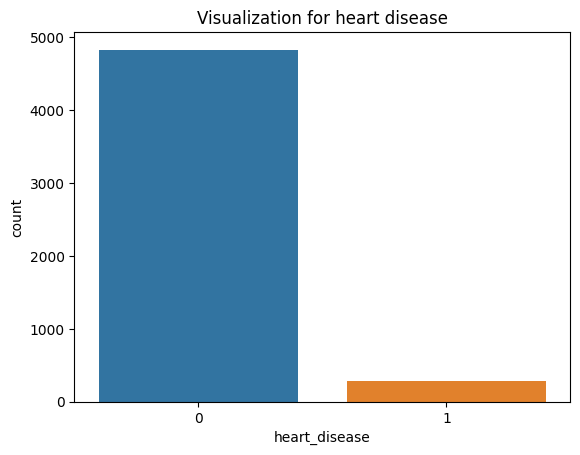

In [14]:
# Feature Visualization
ax = sns.countplot(data = df, x = "heart_disease")
ax.set_title("Visualization for heart disease");

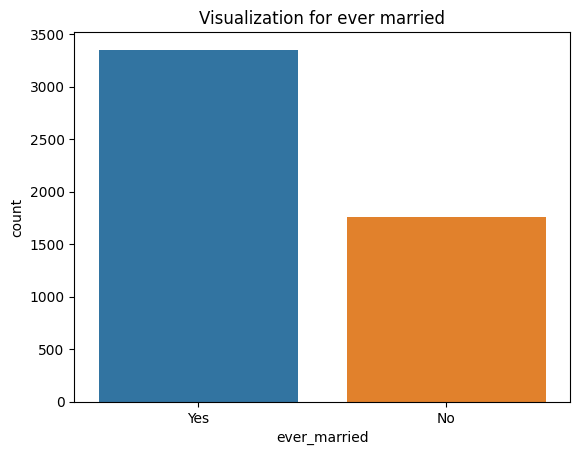

In [15]:
# Feature Visualization
ax = sns.countplot(data = df, x = "ever_married")
ax.set_title("Visualization for ever married");

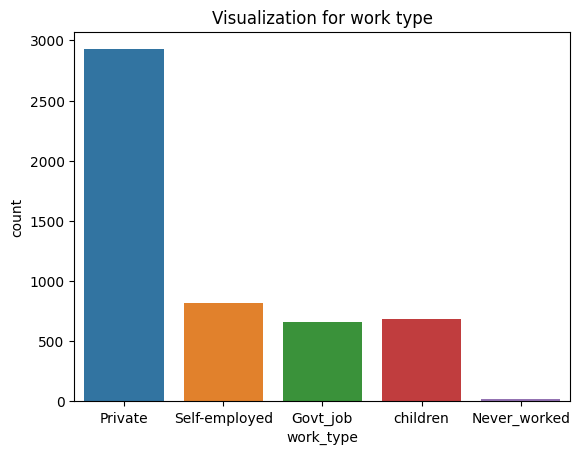

In [16]:
# Feature Visualization
ax = sns.countplot(data = df, x = "work_type")
ax.set_title("Visualization for work type");

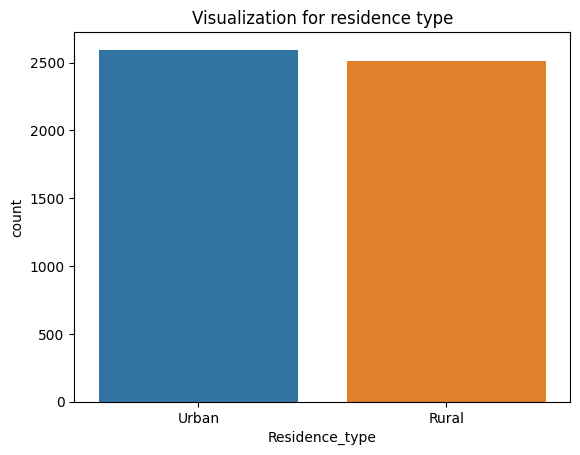

In [17]:
# Feature Visualization
ax = sns.countplot(data = df, x = "Residence_type")
ax.set_title("Visualization for residence type");

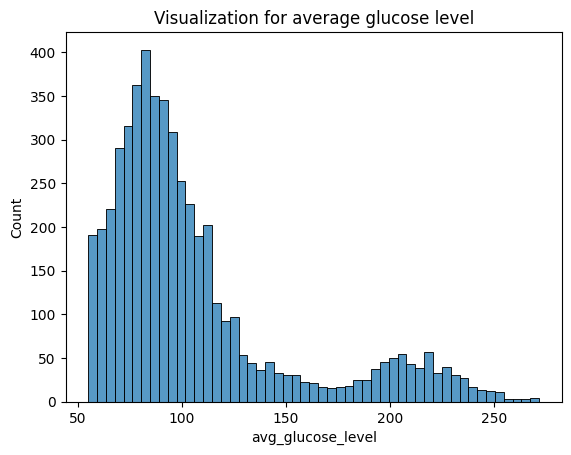

In [18]:
# Feature Visualization
ax = sns.histplot(data = df, x = "avg_glucose_level")
ax.set_title("Visualization for average glucose level");

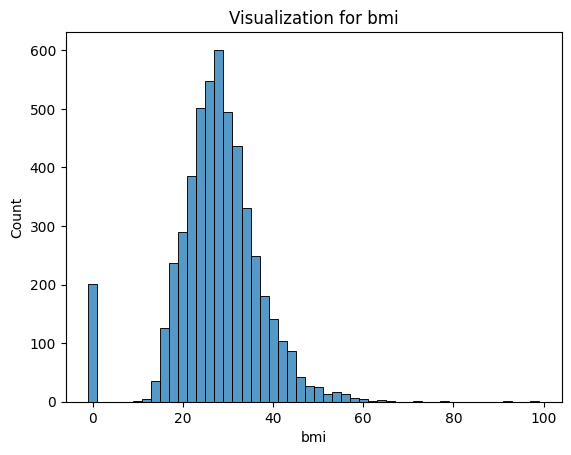

In [19]:
# Feature Visualization
ax = sns.histplot(data = df, x = "bmi", bins = "auto", binwidth = 2)
ax.set_title("Visualization for bmi");

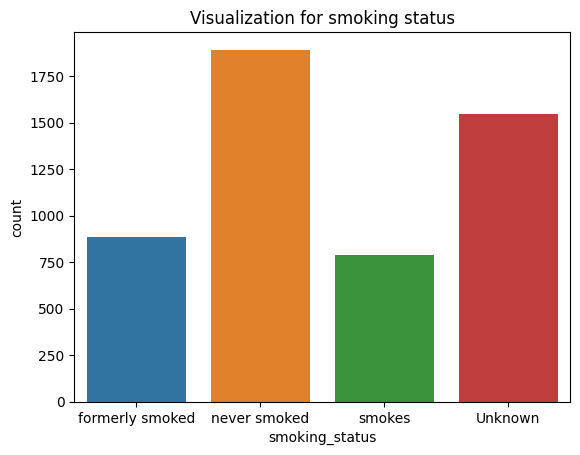

In [20]:
# Feature Visualization
ax = sns.countplot(data = df, x = "smoking_status")
ax.set_title("Visualization for smoking status");

In [21]:
# Checking for outliers.
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,27.717397,0.048728
std,22.612647,0.296607,0.226063,45.283560,9.645369,0.215320
min,0.080000,0.000000,0.000000,55.120000,-1.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,22.900000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,27.700000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


There may be outliers in the bmi column, as there is a mean of 27.72 and a max value of 97.6.

In [22]:
# Getting correlation values

corr = df.corr(numeric_only = True)
corr.round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.00,0.28,0.26,0.24,0.21,0.25
hypertension,0.28,1.00,0.11,0.17,0.07,0.13
heart_disease,0.26,0.11,1.00,0.16,-0.03,0.13
avg_glucose_level,0.24,0.17,0.16,1.00,0.08,0.13
bmi,0.21,0.07,-0.03,0.08,1.00,-0.05
stroke,0.25,0.13,0.13,0.13,-0.05,1.00


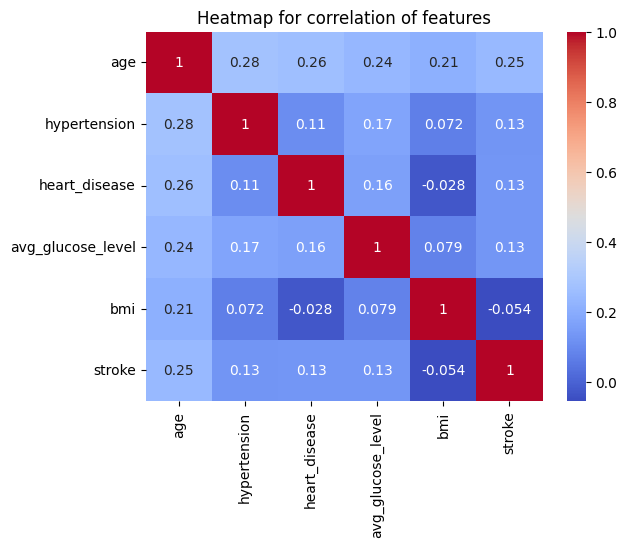

In [23]:
# creating heatmap of correlation between features
ax = sns.heatmap(data = corr, cmap = "coolwarm", annot = True)
ax.set_title("Heatmap for correlation of features");

There are no moderate or strong correlations between numeric features.

#EDA using multivariate visualizations:

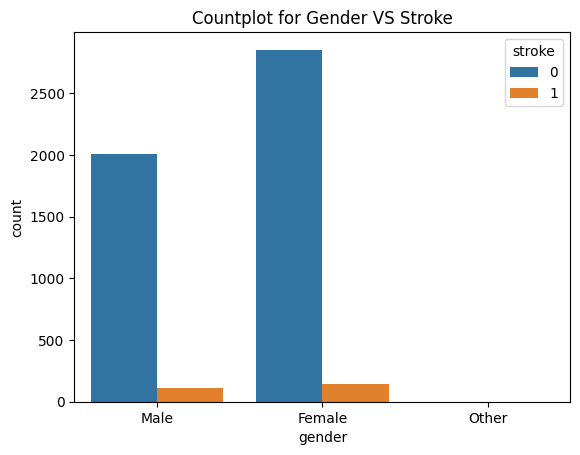

In [24]:
# countplot for gender vs stroke
ax = sns.countplot(data = df, x = "gender", hue = "stroke")
ax.set_title("Countplot for Gender VS Stroke");

Females are more likely to have strokes. They are also more likely to not have strokes.

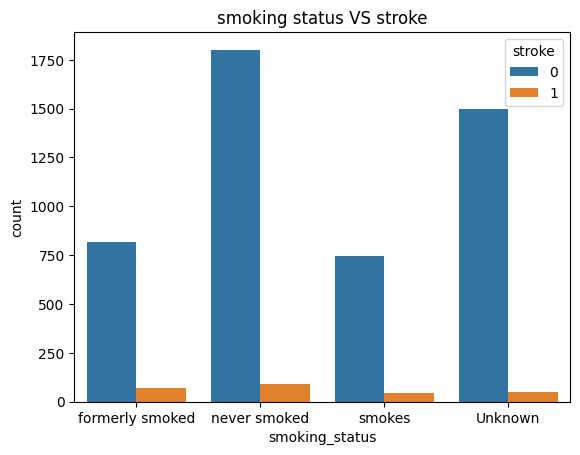

In [25]:
# countplot for smoking status VS stroke
ax = sns.countplot(data = df, x = "smoking_status",hue = "stroke")
ax.set_title("smoking status VS stroke");

Those that have never smoked have the highest count for no stroke as well as the highest count for stroke.

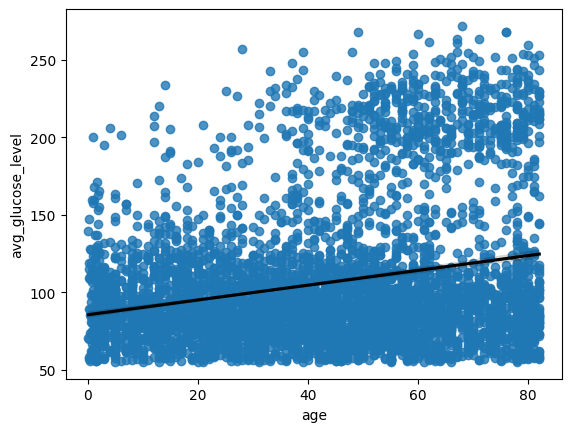

In [26]:
# regression plot for blood pressure vs stroke
line_kws = dict(color='black')
ax = sns.regplot(data = df, x = "age", y = "avg_glucose_level",line_kws=line_kws)

Positive correlation between age and average glucose level. Higher average glucose levels were recorded for older individuals.

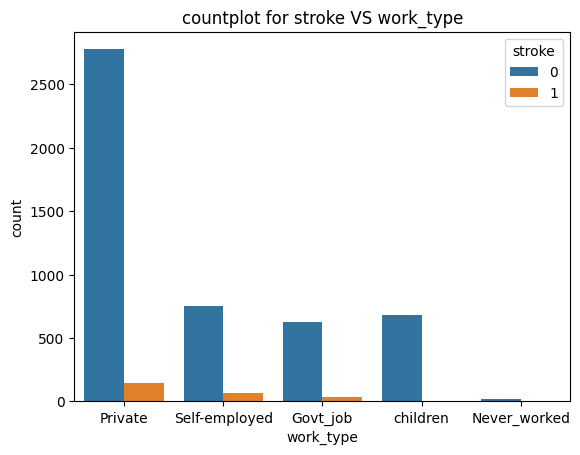

In [27]:
# countplot for stroke VS work_type
ax = sns.countplot(data = df, x="work_type", hue = "stroke")
ax.set_title("countplot for stroke VS work_type");

Those who worked in the private sector had the highest count for strokes as well as the highest count for no stroke.

# Chosen visualizations:

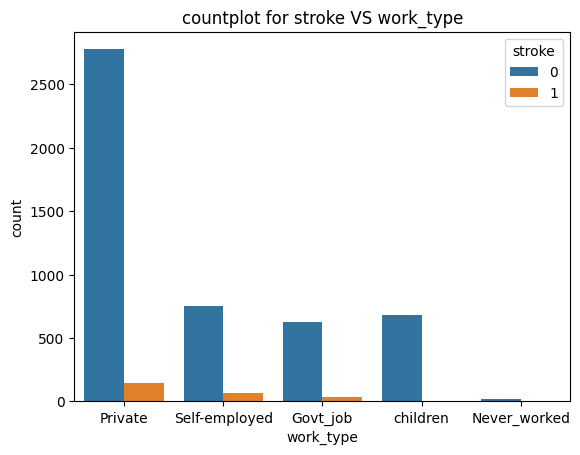

In [28]:
# countplot for stroke VS work_type
ax = sns.countplot(data = df, x="work_type", hue = "stroke")
ax.set_title("countplot for stroke VS work_type");

Those who worked in the private sector had the highest count for strokes as well as the highest count for no stroke.

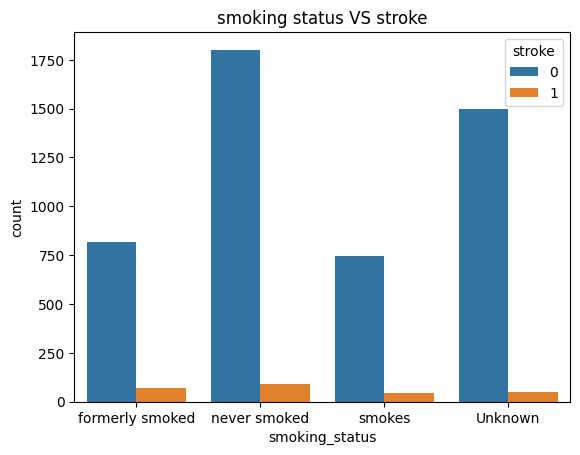

In [29]:
# countplot for smoking status VS stroke
ax = sns.countplot(data = df, x = "smoking_status",hue = "stroke")
ax.set_title("smoking status VS stroke");

Those that have never smoked have the highest count for no stroke as well as the highest count for stroke.

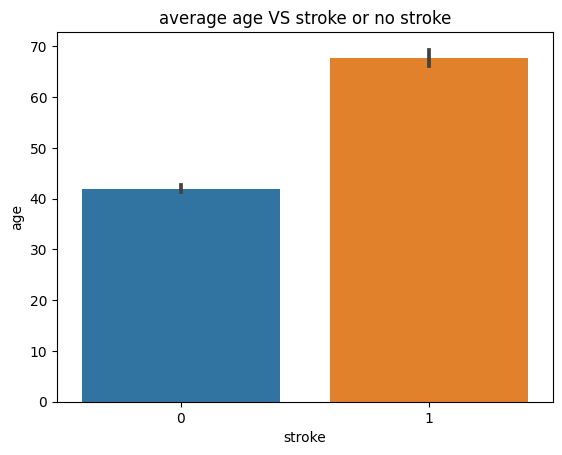

In [85]:
ax = sns.barplot(data=df, x='stroke', y='age')
ax.set_title("average age VS stroke or no stroke");

#MODELING

##Preprocessing steps

In [30]:
# displaying info and first 5 rows
dfml.info()
dfml.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


For our preprocessing we will have to impute the missing values and scale the numeric data. Encoding is also required for categorical data

In [31]:
dfml["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

This dataset is heavily imbalanced.

In [32]:
# Assigning X and Y features and performing train/test split
X = dfml.drop(columns = ["stroke","id"]) # dropping unwanted columns
Y = dfml["stroke"]

# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, random_state = 42)

In [33]:
# Creating objects for preprocessing
scaler = StandardScaler()
imputer = SimpleImputer(strategy = "mean")
numpipe = make_pipeline(imputer,scaler)
numcol = make_column_selector(dtype_include = "number")
numtuple = (numpipe,numcol)

In [34]:
ohe = OneHotEncoder(sparse_output = False, handle_unknown = "ignore")
catpipe = make_pipeline(ohe)
catcol = make_column_selector(dtype_include = "object")
cattuple = (catpipe,catcol)

In [35]:
# Creating column tansformer
preprocessor = make_column_transformer(numtuple,cattuple, remainder = "drop")
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae1d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae920>)])

In [36]:
#Using SMOTE to balance classes
smote = SMOTE(random_state = 42)

## Decision tree Classifier

In [37]:
# model
dtc = DecisionTreeClassifier(random_state = 42, class_weight = "balanced")
dpipe = make_sampler_pipeline(preprocessor, smote, dtc)
dpipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae1d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae920>)])),
                ('smote', SMOTE(random_state=42)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [38]:
# base metrics
dtc_trainpred = dpipe.predict(X_train)
dtc_testpred = dpipe.predict(X_test)

print('Train Report')
print(classification_report(Y_train, dtc_trainpred))

print('Test Report')
print(classification_report(Y_test, dtc_testpred))

Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3645
           1       1.00      1.00      1.00       187

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832

Test Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1216
           1       0.11      0.19      0.14        62

    accuracy                           0.89      1278
   macro avg       0.54      0.56      0.54      1278
weighted avg       0.92      0.89      0.90      1278



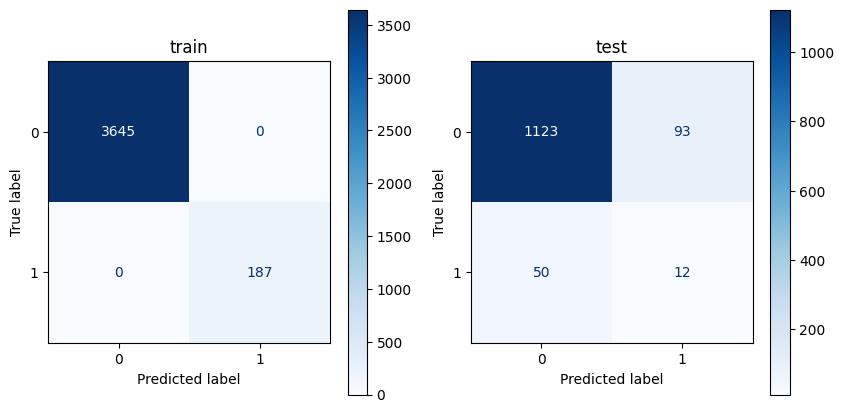

In [39]:
# confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_train, dtc_trainpred, ax = axes[0], cmap = "Blues");
axes[0].set_title("train")

ConfusionMatrixDisplay.from_predictions(Y_test, dtc_testpred, ax = axes[1], cmap = "Blues");
axes[1].set_title("test");

In [40]:
# tuning
dpipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae1d0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae920>)])),
  ('smote', SMOTE(random_state=42)),
  ('decisiontreeclassifier

In [41]:
param_grid = {
    'decisiontreeclassifier__max_depth': [1,5,10,15,20],
    'decisiontreeclassifier__max_features': [None,1,4,6,10],
    }

In [42]:
# gridsearch
grid_search = GridSearchCV(dpipe, param_grid, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'decisiontreeclassifier__max_depth': 20,
 'decisiontreeclassifier__max_features': 10}

In [43]:
best_model = grid_search.best_estimator_

In [44]:
# tuned metrics

trainpredtuned = best_model.predict(X_train)
testpredtuned = best_model.predict(X_test)

print('Train\n', classification_report(Y_train, trainpredtuned))
print('Test\n', classification_report(Y_test, testpredtuned))

Train
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3645
           1       0.79      0.99      0.88       187

    accuracy                           0.99      3832
   macro avg       0.90      0.99      0.94      3832
weighted avg       0.99      0.99      0.99      3832

Test
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      1216
           1       0.11      0.21      0.15        62

    accuracy                           0.88      1278
   macro avg       0.53      0.56      0.54      1278
weighted avg       0.92      0.88      0.90      1278



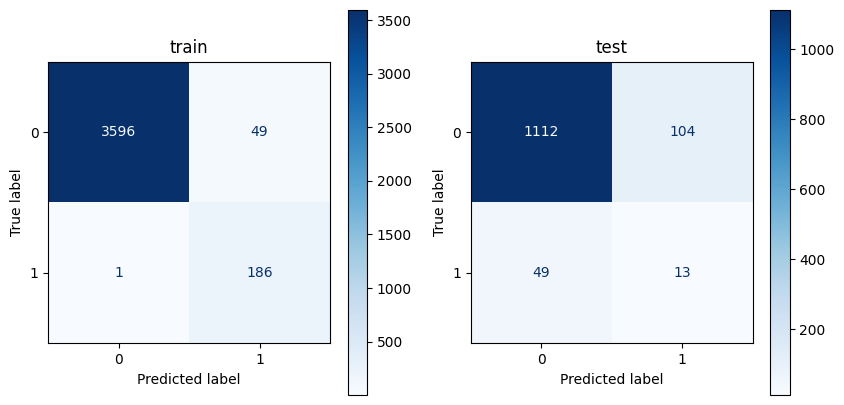

In [45]:
# confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_train, trainpredtuned, ax = axes[0], cmap = "Blues");
axes[0].set_title("train")

ConfusionMatrixDisplay.from_predictions(Y_test, testpredtuned, ax = axes[1], cmap = "Blues");
axes[1].set_title("test");

## K-nearest neighbours classifier

In [46]:
# model
knn = KNeighborsClassifier()
kpipe = make_sampler_pipeline(preprocessor, smote, knn)
kpipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae1d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae920>)])),
                ('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [47]:
# base metrics
knn_trainpred = kpipe.predict(X_train)
knn_testpred = kpipe.predict(X_test)

print('Train Report')
print(classification_report(Y_train, knn_trainpred))

print('Test Report')
print(classification_report(Y_test, knn_testpred))

Train Report
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3645
           1       0.31      1.00      0.47       187

    accuracy                           0.89      3832
   macro avg       0.66      0.94      0.71      3832
weighted avg       0.97      0.89      0.92      3832

Test Report
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      1216
           1       0.08      0.31      0.13        62

    accuracy                           0.80      1278
   macro avg       0.52      0.57      0.51      1278
weighted avg       0.92      0.80      0.85      1278



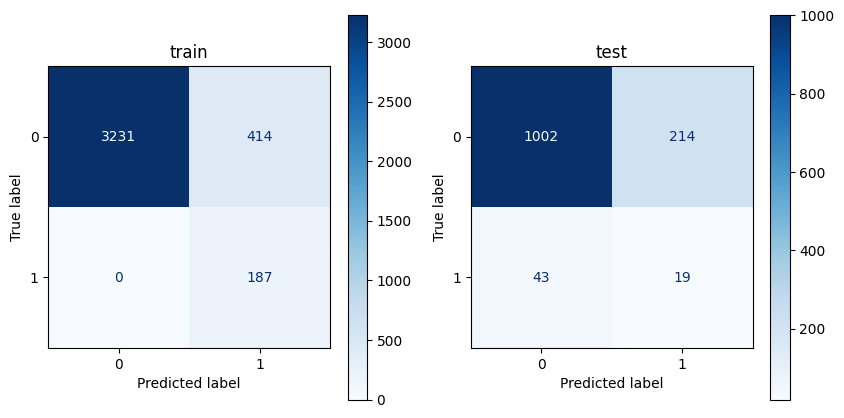

In [48]:
# confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_train, knn_trainpred, ax = axes[0], cmap = "Blues");
axes[0].set_title("train")

ConfusionMatrixDisplay.from_predictions(Y_test, knn_testpred, ax = axes[1], cmap = "Blues");
axes[1].set_title("test");

In [49]:
# tuning
kpipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae1d0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae920>)])),
  ('smote', SMOTE(random_state=42)),
  ('kneighborsclassifier',

In [50]:
param_grid = {
    'kneighborsclassifier__n_neighbors': [5,6,7,9,12],

    }

In [51]:
# gridsearch
grid_search = GridSearchCV(kpipe, param_grid, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'kneighborsclassifier__n_neighbors': 6}

In [52]:
best_model = grid_search.best_estimator_

In [53]:
# tuned metrics

trainpredtuned = best_model.predict(X_train)
testpredtuned = best_model.predict(X_test)

print('Train\n', classification_report(Y_train, trainpredtuned))
print('Test\n', classification_report(Y_test, testpredtuned))

Train
               precision    recall  f1-score   support

           0       1.00      0.90      0.94      3645
           1       0.33      1.00      0.49       187

    accuracy                           0.90      3832
   macro avg       0.66      0.95      0.72      3832
weighted avg       0.97      0.90      0.92      3832

Test
               precision    recall  f1-score   support

           0       0.96      0.84      0.89      1216
           1       0.08      0.27      0.12        62

    accuracy                           0.81      1278
   macro avg       0.52      0.56      0.51      1278
weighted avg       0.92      0.81      0.86      1278



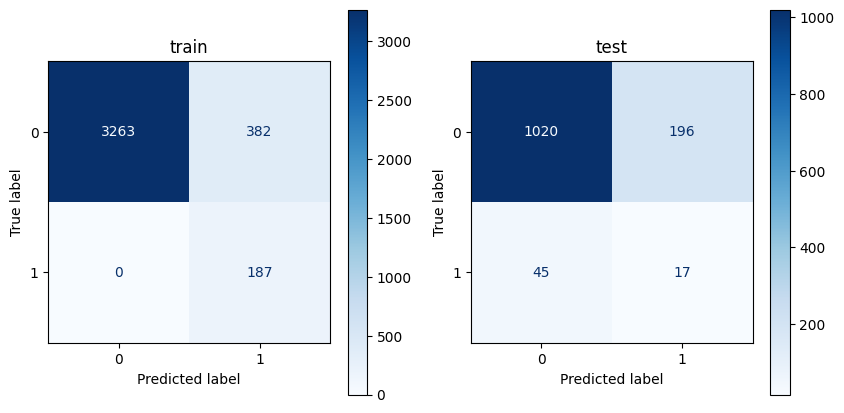

In [54]:
# confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_train, trainpredtuned, ax = axes[0], cmap = "Blues");
axes[0].set_title("train")

ConfusionMatrixDisplay.from_predictions(Y_test, testpredtuned, ax = axes[1], cmap = "Blues");
axes[1].set_title("test");

# Logistic regression

In [55]:
# model
lr = LogisticRegression(random_state = 42, class_weight = "balanced")
lrpipe = make_sampler_pipeline(preprocessor,smote, lr)
lrpipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae1d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae920>)])),
                ('smote', SMOTE(random_state=42)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [56]:
# base metrics
trainpred = lrpipe.predict(X_train)
testpred =  lrpipe.predict(X_test)

print('Train\n', classification_report(Y_train, trainpred))
print('Test\n', classification_report(Y_test, testpred))

Train
               precision    recall  f1-score   support

           0       0.99      0.75      0.85      3645
           1       0.14      0.79      0.24       187

    accuracy                           0.75      3832
   macro avg       0.56      0.77      0.54      3832
weighted avg       0.94      0.75      0.82      3832

Test
               precision    recall  f1-score   support

           0       0.98      0.74      0.84      1216
           1       0.13      0.77      0.22        62

    accuracy                           0.74      1278
   macro avg       0.56      0.76      0.53      1278
weighted avg       0.94      0.74      0.81      1278



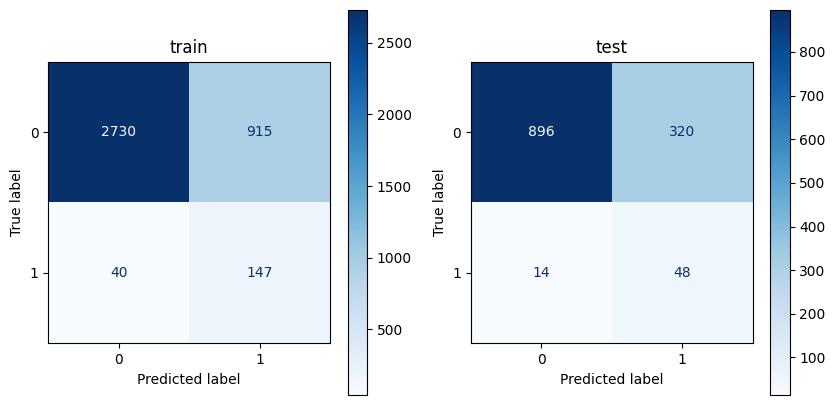

In [57]:
# confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_train, trainpred, ax = axes[0], cmap = "Blues");
axes[0].set_title("train")

ConfusionMatrixDisplay.from_predictions(Y_test, testpred, ax = axes[1], cmap = "Blues");
axes[1].set_title("test");

In [58]:
# tuning
lrpipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae1d0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae920>)])),
  ('smote', SMOTE(random_state=42)),
  ('logisticregression',
 

In [59]:
param_grid = {
    'logisticregression__C': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],

    }

In [60]:
# gridsearch
grid_search = GridSearchCV(lrpipe, param_grid, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'logisticregression__C': 0.0001}

In [61]:
best_model = grid_search.best_estimator_

In [62]:
# tuned metrics

trainpredtuned = best_model.predict(X_train)
testpredtuned = best_model.predict(X_test)

print('Train\n', classification_report(Y_train, trainpredtuned))
print('Test\n', classification_report(Y_test, testpredtuned))

Train
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      3645
           1       0.13      0.74      0.23       187

    accuracy                           0.75      3832
   macro avg       0.56      0.75      0.54      3832
weighted avg       0.94      0.75      0.82      3832

Test
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      1216
           1       0.14      0.77      0.23        62

    accuracy                           0.75      1278
   macro avg       0.56      0.76      0.54      1278
weighted avg       0.94      0.75      0.82      1278



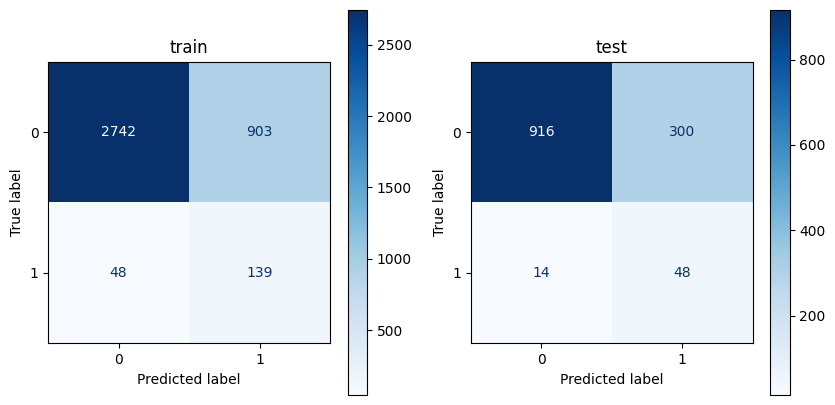

In [63]:
# confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_train, trainpredtuned, ax = axes[0], cmap = "Blues");
axes[0].set_title("train")

ConfusionMatrixDisplay.from_predictions(Y_test, testpredtuned, ax = axes[1], cmap = "Blues");
axes[1].set_title("test");

#PCA for decisiontree classifier

In [64]:
# PCA with 85% explained variance
PCA85 = PCA(n_components=.85)

In [65]:
transformer = make_sampler_pipeline(preprocessor,PCA85)
d = DecisionTreeClassifier(random_state = 42)
dpcapipe = make_pipeline(transformer,d)
dpcapipe.fit(X_train,Y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae1d0>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f9980cae920>)])),
                                 ('pca', PCA(n_components=0.85))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [66]:
trainpredtuned = dpcapipe.predict(X_train)
testpredtuned = dpcapipe.predict(X_test)

print('Train\n', classification_report(Y_train, trainpredtuned))
print('Test\n', classification_report(Y_test, testpredtuned))

Train
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3645
           1       1.00      1.00      1.00       187

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832

Test
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1216
           1       0.17      0.16      0.17        62

    accuracy                           0.92      1278
   macro avg       0.56      0.56      0.56      1278
weighted avg       0.92      0.92      0.92      1278



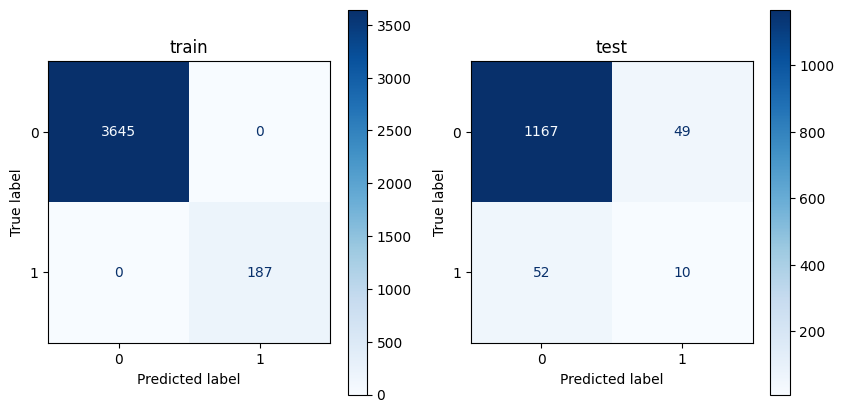

In [67]:
# confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_train, trainpredtuned, ax = axes[0], cmap = "Blues");
axes[0].set_title("train")

ConfusionMatrixDisplay.from_predictions(Y_test, testpredtuned, ax = axes[1], cmap = "Blues");
axes[1].set_title("test");

# Production model

The final production model chosen for the problem would be the logistic regression model. This model was able to reduce the number of false negatives amongst all models created. This is important as we would want to avoid false negtives when it comes to stroke predictions. Tis model achieved an accuracy score of 74%.